In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2

In [2]:
data = keras.datasets.mnist
(trainX,trainY), (testX, testY) = data.load_data()

In [3]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
# Scaling pixel data b/w 0 & 1
trainX = trainX / 255.0
testX = testX / 255.0

## Defining the Neural Net
#### Layers:
- Flatten: Pasrses the $28\times28$ matrix into a $784\times1$ vector for passing into the input layer of $784$ neurons.
- Dense: Defines a layer whose each neuron is connected to each neuron of the surrounding layers.

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(16, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [6]:
opt = keras.optimizers.SGD(lr=3.0)

In [7]:
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history  = model.fit(trainX, trainY, epochs=15, batch_size=200)
history1 = model.fit(trainX, trainY, epochs=15, batch_size=400)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1178 - accuracy: 0.9638
Epoch 2/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1187 - accuracy: 0.9629
Epoch 3/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1149 - accuracy: 0.9643
Epoch 4/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1150 - accuracy: 0.9655
Epoch 5/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1137 - accuracy: 0.9652
Epoch 6/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1148 - accuracy: 0.9639
Epoch 7/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1113 - accuracy: 0.9661
Epoch 8/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.1125 - accuracy: 0.9650
Epoch 9/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.1103 - accuracy: 0.9663
Epoch 10/15
60000/60000

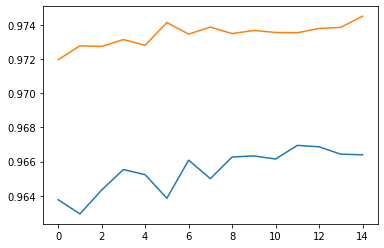

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history1.history["accuracy"])
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(testX, testY)

In [ ]:
predY = model.predict(testX)
wrng = []

for i in range(len(testY)):
    if np.argmax(predY[i]) != testY[i]:
        wrng.append(i)

In [ ]:
len(wrng)
plt.imshow(testX[wrng[100]])

In [ ]:
for i in range(len(testX)):
    if  testY[i] != np.argmax(predY[i]):
        plt.imshow(testX[1], cmap=plt.cm.binary)

## Importing Custom Images

In [ ]:
img = cv2.imread('imgs/01.png',0)
img = cv2.resize(img, dsize=(28,28))
# img = np.resize(img, (28,28))
# img_ar = 1-np.array(img)
img = img.reshape(1, 28, 28)
# len(img[0][0])
img = 1-img/255
plt.imshow(img[0], cmap=plt.cm.binary)

In [ ]:
#img_ar = img_ar/255
t = np.append(testX, img, axis=0)
plt.imshow(t[-1], cmap=plt.cm.binary)

In [ ]:
predY = model.predict(t)
np.argmax(predY[-1])

In [ ]:
plt.imshow(t[-1], cmap=plt.cm.binary)